In [17]:
from circuit_scoring import rank_order_viz as viz
from circuit_scoring import multiple_experiment_scoring as mes
import pandas as pd
from numpy import inf,sqrt
import json
from IPython.display import display, HTML
import matplotlib.pyplot as plt


# Notes

The BL1-A and BL1-H channels have different numbers of experimental conditions in the ETL runs. This might not be a mistake, since TASBE may choose to keep different events under the two different channels. Nonetheless, it might be better to use the raw log10 data. Moreover, using BL1-H seems to decrease variance, so that seems like the better channel to use.

# Load results dataframes

In [18]:
df_fnames_etl_A = ["BL1_A_analysis/Round{}_etl_fewer_events_BL1A_stats.csv".format(i) for i in [1,3,4]]
cond_fnames_etl_A = ["BL1_A_analysis/Round{}_etl_fewer_events_BL1A_conditions.json".format(i) for i in [1,3,4]]


In [19]:
df_fnames_etl_H = ["BL1_H_analysis/Round{}_etl_fewer_events_BL1H_stats.csv".format(i) for i in [1,3,4]]
cond_fnames_etl_H = ["BL1_H_analysis/Round{}_etl_fewer_events_BL1H_conditions.json".format(i) for i in [1,3,4]]


In [20]:
df_fnames_log10_A = ["BL1_A_analysis/Round{}_rawlog10_drop_nan_BL1A_stats.csv".format(i) for i in [1,3,4]]
cond_fnames_log10_A = ["BL1_A_analysis/Round{}_rawlog10_drop_nan_BL1A_conditions.json".format(i) for i in [1,3,4]]

In [21]:
df_fnames_log10_H = ["BL1_H_analysis/Round{}_rawlog10_drop_nan_BL1H_stats.csv".format(i) for i in [1,3,4]]
cond_fnames_log10_H = ["BL1_H_analysis/Round{}_rawlog10_drop_nan_BL1H_conditions.json".format(i) for i in [1,3,4]]

# Calculate whole circuit scores across all conditions

In [22]:
# circuit_df, conditions = mes.get_circuit_rankings(df_fnames_etl_A,cond_fnames_etl_A)
# display(HTML(circuit_df.to_html()))
# viz.make_bar_df(circuit_df["mean rank (1-9)"].values,circuit_df["std rank"].values,circuit_df["circuit"].values,"", "Mean rank: 1st-9th",[0,10],True,"roundtrip_etl_BL1A_circuit_performance.pdf")
# print([(circuit, len(n)) for circuit,n in conditions.items()])

In [23]:
# circuit_df,conditions = mes.get_circuit_rankings(df_fnames_etl_H,cond_fnames_etl_H)
# display(HTML(circuit_df.to_html()))
# viz.make_bar_df(circuit_df["mean rank (1-9)"].values,circuit_df["std rank"].values,circuit_df["circuit"].values,"", "Mean rank: 1st-9th",[0,10],True,"roundtrip_etl_BL1H_circuit_performance.pdf")
# print([(circuit, len(n)) for circuit,n in conditions.items()])

In [24]:
# circuit_df, conditions = mes.get_circuit_rankings(df_fnames_log10_A,cond_fnames_log10_A)
# display(HTML(circuit_df.to_html()))
# viz.make_bar_df(circuit_df["mean rank (1-9)"].values,circuit_df["std rank"].values,circuit_df["circuit"].values,"", "Mean rank: 1st-9th",[0,10],True,"roundtrip_log10_BL1A_circuit_performance.pdf")
# print([(circuit, len(n)) for circuit,n in conditions.items()])

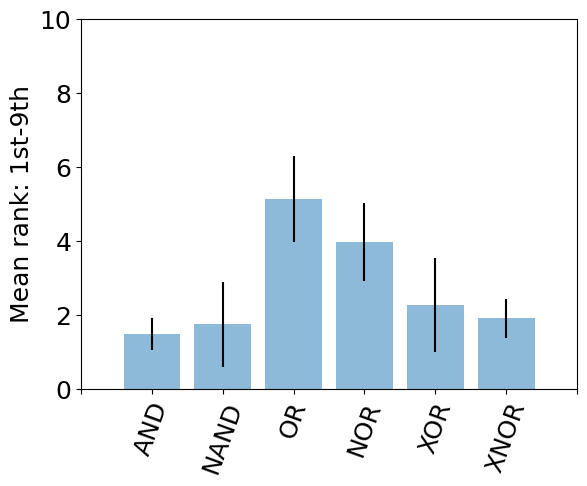

In [25]:
circuit_df, conditions = mes.get_circuit_rankings(df_fnames_log10_H,cond_fnames_log10_H)
display(HTML(circuit_df.to_html()))
viz.make_bar_df(circuit_df["mean rank (1-9)"].values,circuit_df["std rank"].values,circuit_df["circuit"].values,"", "Mean rank: 1st-9th",[0,10],True,"roundtrip_log10_BL1H_circuit_performance.pdf")

In [26]:
media = set([])
times = set([])
temps = set([])
for circuit,conds in conditions.items():
    for med,time,temp in conds:
        media.add(med)
        times.add(time)
        temps.add(temp)
print(media)
print(times)
print(temps)

{'YEP 2%-dextrose', 'Synthetic_Complete', 'Synthetic_Complete_2%Glycerol_2%Ethanol', 'Synthetic_Complete_1%Sorbitol'}
{32.0, 64.0, 34.0, 40.0, 52.0, 20.0, 24.0, 28.0}
{30.0}


# Graph ETL results by round and circuit

In [27]:
# viz.plot_stats_df_old(dfs_etl[0], "strain_circuit", ["media_type","timepoint"], "mean_rank",top=None,customized_labels=viz.customize_xlabels_media,show_plot=True)

In [28]:
# viz.plot_stats_df_old(dfs_etl[1], "strain_circuit", ["media_type","timepoint"], "mean_rank",top=None,customized_labels=viz.customize_xlabels_media,show_plot=True,savename_start="BL1_A_analysis/Round3_etl_conditions_plot")

In [29]:
# viz.plot_stats_df_old(dfs_etl[2], "strain_circuit", ["media_type","timepoint"], "mean_rank",top=None,customized_labels=viz.customize_xlabels_media,show_plot=True)

# Graph raw log10 results by round and circuit

In [30]:
# viz.plot_stats_df_old(dfs10[0], "strain_circuit", ["media_type","timepoint"], "mean_rank",top=None,customized_labels=viz.customize_xlabels_media,show_plot=True)

/home/bree/anaconda3/envs/circuit_scoring/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


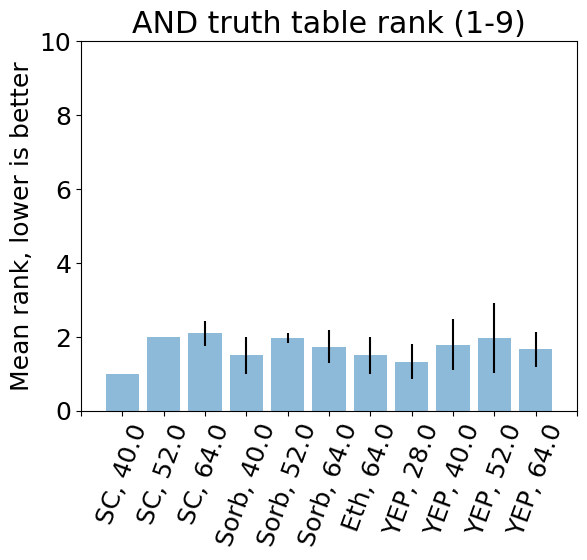

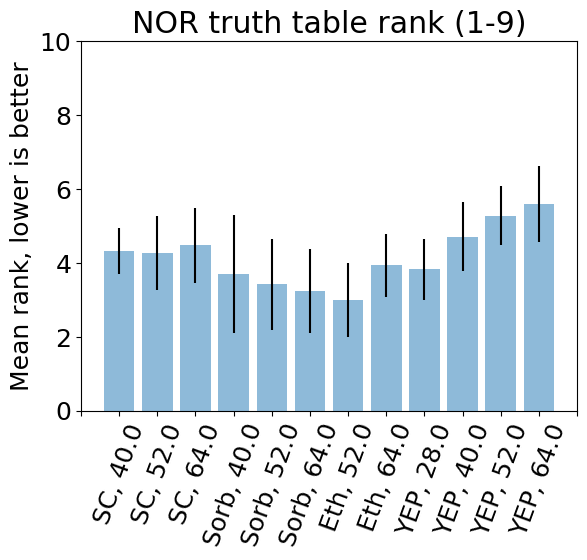

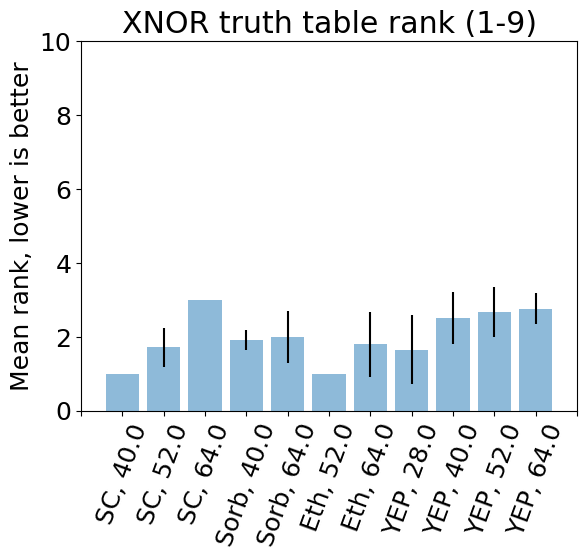

In [31]:
viz.plot_stats_df_old(pd.read_csv(df_fnames_log10_H[1]), "strain_circuit", ["media_type","timepoint","temperature"], "mean_rank",top=None,customized_labels=viz.customize_xlabels_media,show_plot=True,savename_start="BL1_H_analysis/Round3_rawlog10_drop_nan_BL1H_stats")

In [32]:
# viz.plot_stats_df_old(dfs10[2], "strain_circuit", ["media_type","timepoint"], "mean_rank",top=None,customized_labels=viz.customize_xlabels_media,show_plot=True)